In [1]:
import numpy as np
from numpy import fft as f
import matplotlib.pyplot as plt
import math

In [2]:
def f1(x):    # The python function representing sin(5t) is declared.
    return np.sin(5*x)

In [3]:
def f2(x):
    return (1 + 0.1*np.cos(x))*np.cos(10*x)

In [4]:
def f3(x): 
    return np.sin(x)**3

In [5]:
def f4(x): 
    return np.cos(x)**3

In [6]:
def f5(x):
    return np.cos(20*x + 5*np.cos(x))

In [7]:
def f6(x):
    return np.exp(-(x*x)/2)

In [8]:
def f7(x):
    index = np.argwhere(x==0.0)[0][0]
    x = np.delete(x, index)
    z=np.sin(x)/x
    y = []
    for i in range(0,len(z)):
        if i != index :
            y.append(z[i])
        else:
            y.append(1)
            y.append(z[i])
    return y

In [9]:
def plot_fft(Y,x_lim,y_lim,function,steps,offset,show_data_points):
    ''' The parameters accepted by the function to do the plotting:
         Y - The DFT of the function, to be plotted, whose magnitude and phase constitute the 2 plots.
         x_lim - The magnitude of maximum frequency to be shown in both the plots.
         y_lim - The magnitude of maximum phase to be shown in the phase plot.
         function - The function to be plottes (in string form to show in graph)
         steps - No. of steps to take for the frequency array.
         offset - The maximum offset for the labels in the graph.
         show_data_points - A boolean, for displaying the data values in the graph.
    '''
    w=np.linspace(-64,64,steps+1)
    w = w[:-1]
    ctr = 0
    fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex = True)

    plt.suptitle("The DFT plots for " + function, fontsize=18)
    # The magnitude plot is plotted
    axes[0].plot(w,abs(Y),lw=2)
    if show_data_points:
        for xy in zip(w, abs(Y)):
            if xy[1] > 1e-3:
                axes[0].annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # To mark the points where the impulse occurs
    axes[0].set_xlim([-x_lim,x_lim])
    axes[0].set_ylabel(r"$|Y|$",size=16)
    axes[0].set_title("Spectrum of " + function, fontsize=14)
    axes[0].grid(True)

    # The phase plot is plotted
    ii=np.where(abs(Y)>1e-3)
    axes[1].plot(w[ii],np.angle(Y[ii]),'go',lw=2)
    if show_data_points:
        for xy in zip(w[ii], np.angle(Y[ii])):                                       
            axes[1].annotate('(%0.2f, %0.2f)' % xy, xy=(xy[0],xy[1]+((-1)**ctr)*offset), textcoords='data')    # To mark the phase at which the impulse occurs
            ctr = ctr + 1
    axes[1].set_xlim([-x_lim,x_lim])
    axes[1].set_ylim([-y_lim,y_lim])
    axes[1].set_ylabel(r"Phase of $Y$",size=16)
    axes[1].set_title("Phase Plot of " + function, fontsize=14)
    axes[1].set_xlabel(r"$k$",size=16)
    axes[1].grid(True)
    plt.show()

In [28]:
def calc_fft(func, steps):
    ''' The parameters for this function:
        func - The python function, which returns the calculated values for the mathematical function for which DFT is to be calculated.
        steps - The number of steps taken in the time interval.
    '''
    x=np.linspace(-8*math.pi,8*math.pi,steps+1);
    x=x[:-1]
    y=func(x)
    Y=f.fftshift(f.fft(y))/steps
    return Y

In [11]:
no_of_steps=1024

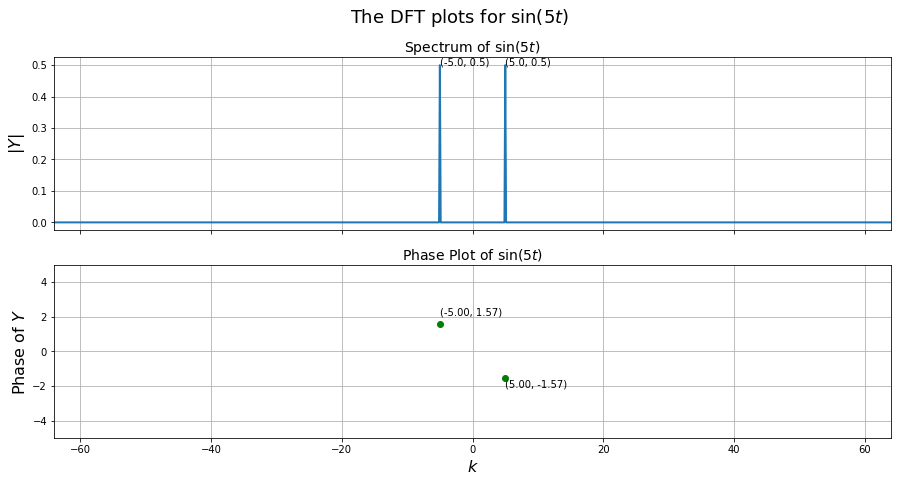

In [29]:
Y = calc_fft(f1, no_of_steps)   # calc_fft is called to calculate and return the calculated DFT.
plot_fft(Y,64,5,r"$\sin(5t)$",no_of_steps,0.5,True)

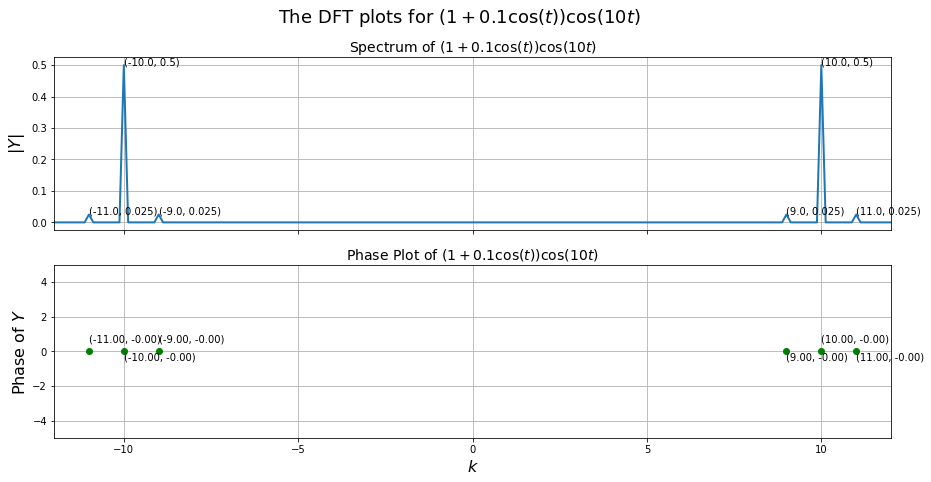

In [13]:
Y = calc_fft(f2, no_of_steps)
plot_fft(Y,12,5,r"$(1+0.1\cos(t))\cos(10t)$",no_of_steps,0.5,True)

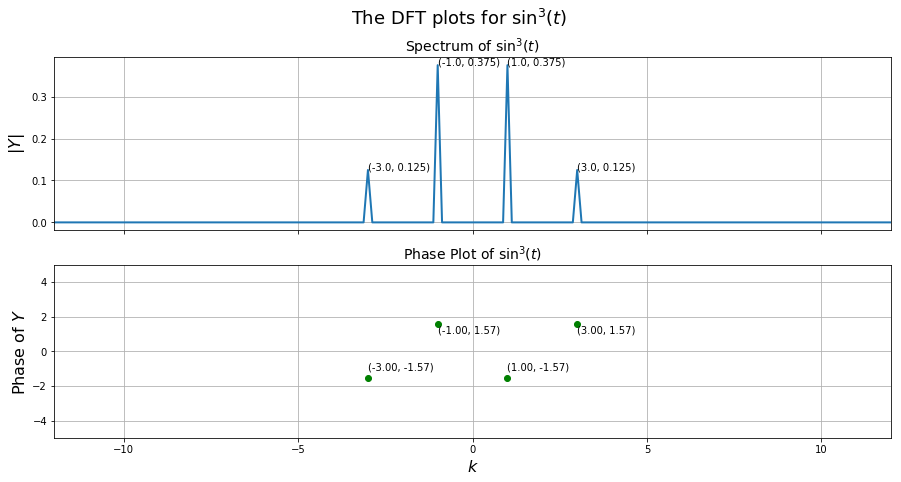

In [14]:
Y = calc_fft(f3, no_of_steps)
plot_fft(Y,12,5,r"$\sin^3(t)$",no_of_steps,0.5,True)

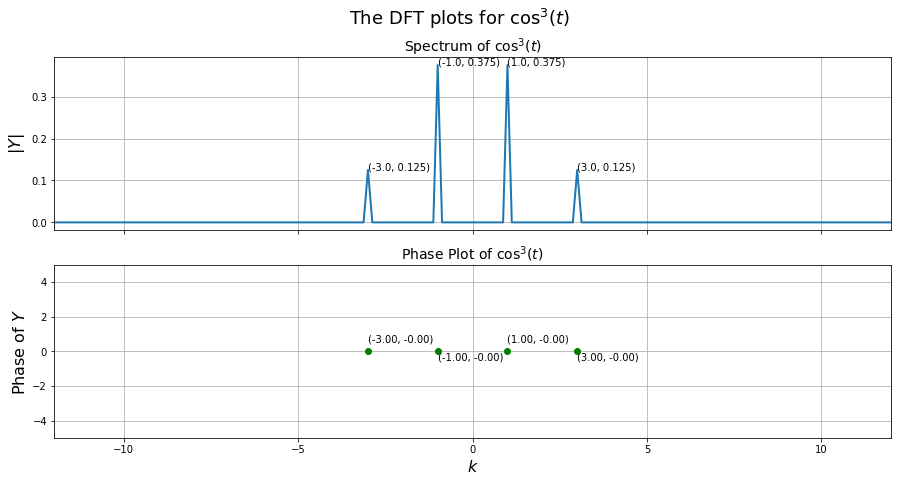

In [15]:
Y = calc_fft(f4, no_of_steps)
plot_fft(Y,12,5,r"$\cos^3(t)$",no_of_steps,0.5,True)

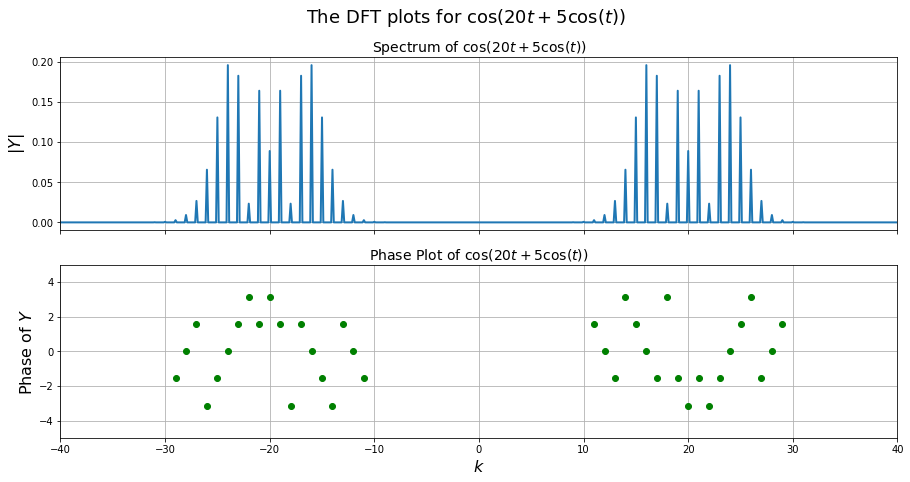

In [16]:
no_of_steps = 1024
Y = calc_fft(f5, no_of_steps)
plot_fft(Y,40,5,r"$\cos(20t + 5\cos(t))$",no_of_steps,0,False)

In [33]:
def calc_fft_2(func, steps):
    ''' The parameters for this function:
        func - The python function, which returns the calculated values for the mathematical function for which DFT is to be calculated.
    '''
    x=np.linspace(-4*math.pi,4*math.pi,steps+1);
    x=x[:-1]
    y=func(x)
    Y=f.fftshift(f.fft(f.ifftshift(y)))/(steps/4)
    return Y

In [18]:
def gauss(w):
    return np.sqrt(1/(2*math.pi))*np.exp(-(w**2)*2) 

The maximum error between the expected and calculated gaussians are  1.80490527317e-15


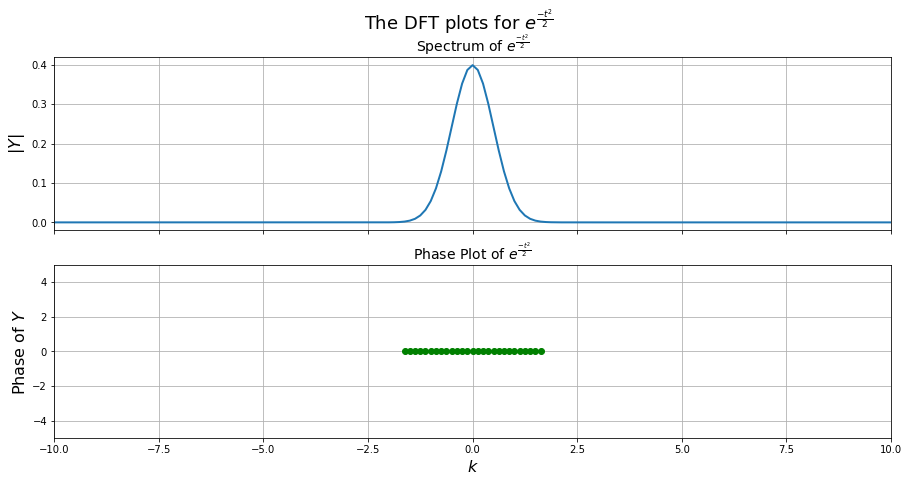

In [34]:
no_of_steps=1024
Y = calc_fft_2(f6, no_of_steps)
w=np.linspace(-64,64,no_of_steps+1)
w = w[:-1]
print ("The maximum error between the expected and calculated gaussians are ", max(np.absolute(gauss(w) - Y)))
plot_fft(Y,10,5,r"$e^{\frac{-t^2}{2}}$",no_of_steps,0,False)

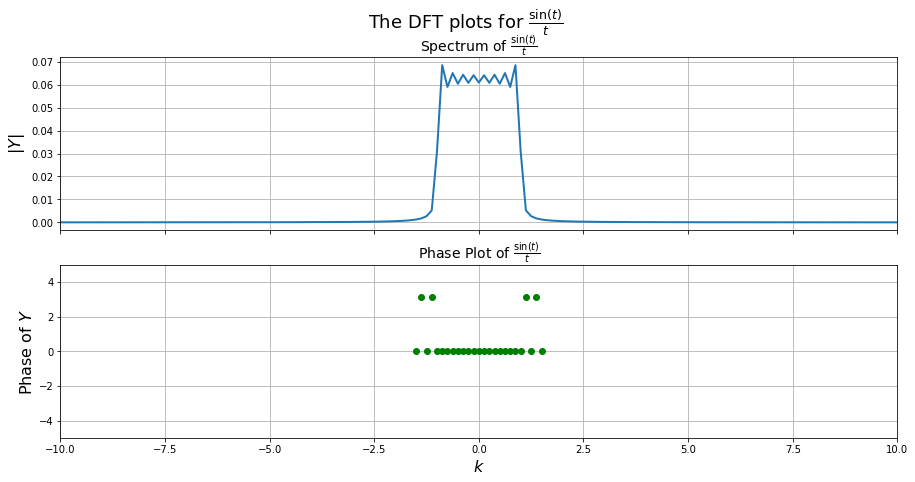

In [20]:
Y = calc_fft(f7, no_of_steps)
plot_fft(Y,10,5,r"$\frac{\sin(t)}{t}$",no_of_steps,0,False)